In [5]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

# deets format:
# First digit: adversary blindness.  0: can see everything; 1: can't see prey; 2: can't see anything
# Second digit: comm setting.  0: no comms; 1: prey can listen; 2: only adversaries comm.
# Third digit: number of prey
# Fouth digit: number of adversaries
# Fifth digit (optional): number of available comms, default 4 (A, B, C, D)

all_the_deets = ['0-2-1-4', '2-2-2-4', '1-2-1-4', '1-2-1-4-8', '1-2-2-4', '1-2-2-4-8', '0-0-1-4',
                 '1-1-1-4', '1-0-1-4', '0-1-1-4', '1-2-1-4-2', '0-2-1-4-8', '0-2-2-4', '0-0-2-4',
                 '2-0-1-4', '2-1-1-4', '2-2-1-4-8', '0-2-2-4-8', '2-1-1-4-8', '1-1-1-4-8', '0-1-1-4-8', '1-2-1-3']

def open_pickle(deets, exp_name='baseline'):
    with open('./learning_curves/commplex_tag-'+deets+'-'+exp_name+'_agrewards.pkl', 'rb') as f:
        data = pickle.load(f)
    return np.array(data)

def get_rewards(deets, exp_name='baseline'):
    all_rewards = open_pickle(deets, exp_name)
    num_adversaries = int(deets.split('-')[3])
    rewards = np.average(all_rewards[:, :num_adversaries], axis=1)
    return rewards

def get_prey_rewards(deets, exp_name='baseline'):
    all_rewards = open_pickle(deets, exp_name)
    num_adversaries = int(deets.split('-')[3])
    rewards = np.average(all_rewards[:, num_adversaries:], axis=1)
    return rewards

def make_comparison(deets_list, labels=None, title="", exp_name='baseline', prey=False):
    rewards_func = get_prey_rewards if prey else get_rewards
    who = 'prey' if prey else 'predator pack'
    rewards_list = [rewards_func(deets, exp_name) for deets in deets_list]
    if labels is None:
        labels = deets_list
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(len(deets_list)):
        ax.plot(rewards_list[i], label=labels[i])
    ax.legend()
    ax.set_xlabel('# 1000s of episodes')
    ax.set_ylabel('average predator reward')
    if title == "":
        ax.set_title('Influence of comms and vision on '+who+' performance\n(4 predators, 1 prey, 4 comm channels)')
    else:
        ax.set_title(title)
    plt.show()

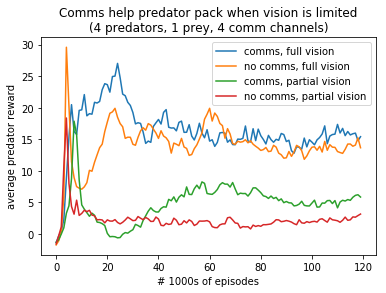

In [6]:
make_comparison(['0-2-1-4', '0-0-1-4', '1-2-1-4', '1-0-1-4'],
                ['comms, full vision', 'no comms, full vision', 'comms, partial vision', 'no comms, partial vision'],
                'Comms help predator pack when vision is limited\n(4 predators, 1 prey, 4 comm channels)',
                exp_name='120k')

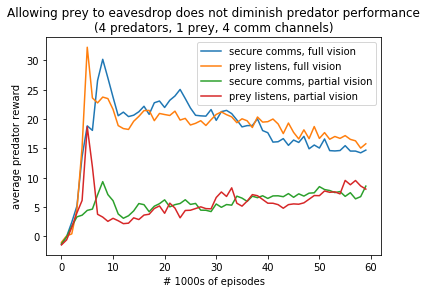

In [48]:
make_comparison(['0-2-1-4', '0-1-1-4', '1-2-1-4', '1-1-1-4'],
                ['secure comms, full vision', 'prey listens, full vision', 'secure comms, partial vision', 'prey listens, partial vision'],
                'Allowing prey to eavesdrop does not diminish predator performance\n(4 predators, 1 prey, 4 comm channels)')

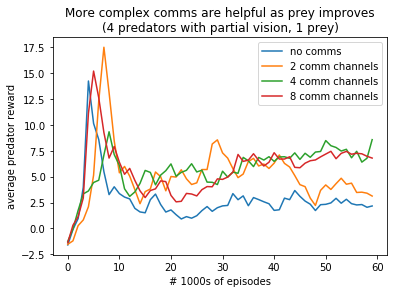

In [55]:
make_comparison(['1-0-1-4', '1-2-1-4-2', '1-2-1-4', '1-2-1-4-8'],
                ['no comms', '2 comm channels', '4 comm channels', '8 comm channels'],
                'More complex comms are helpful as prey improves\n(4 predators with partial vision, 1 prey)')

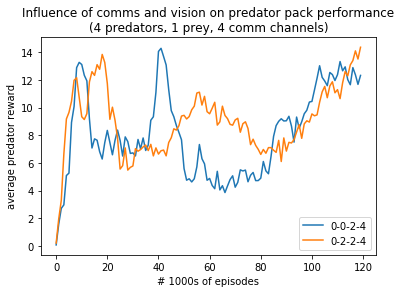

In [9]:
make_comparison(['0-0-2-4', '0-2-2-4'], exp_name='120k')

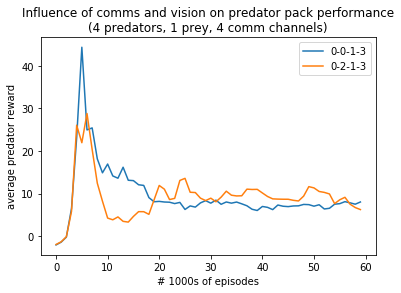

In [13]:
make_comparison(['0-0-1-3', '0-2-1-3'])

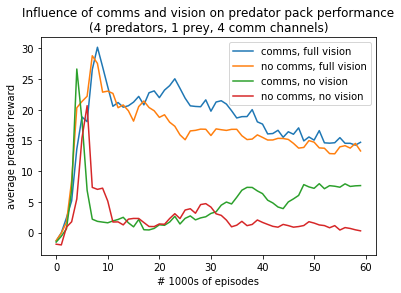

In [7]:
make_comparison(['0-2-1-4', '0-0-1-4', '2-2-1-4', '2-0-1-4'], ['comms, full vision', 'no comms, full vision', 'comms, no vision', 'no comms, no vision'])

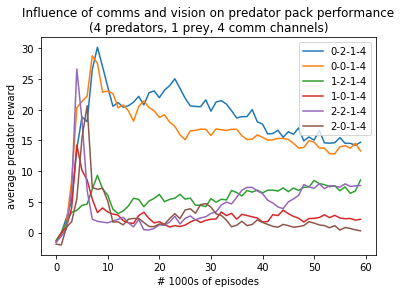

In [8]:
make_comparison(['0-2-1-4', '0-0-1-4', '1-2-1-4', '1-0-1-4', '2-2-1-4', '2-0-1-4'])

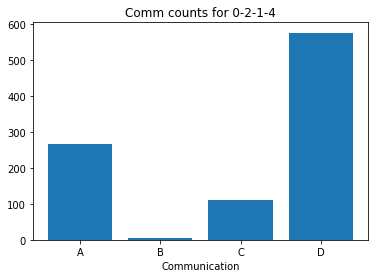

In [29]:
deets = '0-2-1-4'
alpha = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
with open('./learning_curves/commplex_tag-'+deets+'-baseline_commcounts.pkl', 'rb') as f:
    counts = pickle.load(f)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(list(range(4)), counts, tick_label=alpha[:4])
ax.set_title('Comm counts for '+deets)
ax.set_xlabel('Communication')
plt.show()